In [1]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_loyalty.csv')
df

,CustomerID,Loyalty,Price,Quality,Community Outreach,Trust,Customer satifaction,Negative publicity
0,1525,6.145,10.00,0.87,-0.07,7.45,0.78,0.04
1,1531,6.033,10.00,0.93,0.14,7.62,0.90,0.05
2,1526,6.531,10.00,0.86,-0.02,7.48,0.85,0.06
3,1523,6.834,10.00,0.92,0.29,7.39,0.87,0.06
4,1524,6.642,10.00,0.85,0.05,7.42,0.66,0.07
...,...,...,...,...,...,...,...,...
1706,200,5.249,9.41,0.79,0.23,6.68,0.41,0.98
1707,414,5.385,10.00,0.79,-0.20,6.80,0.52,0.98
1708,1500,4.815,9.61,0.77,-0.18,6.63,0.44,0.98
1709,1005,5.467,10.00,0.93,-0.30,6.41,0.50,0.98


In [3]:
df = pd.read_csv('salaries.csv')
df

C:\Users\Poojan\AppData\Local\Temp\ipykernel_16744\1147646638.py:1: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('salaries.csv')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014


In [7]:
# feature selection and sorting the data frame according to
# the selected feature values.

df1 = df.iloc[:,6]
df2 = df1.dropna(axis=0)
df3 = df2.sort_values()

df3

TypeError: '<' not supported between instances of 'str' and 'float'

In [6]:
#finding the three quartiles q1,q2 and q3

median = df2.median()
q1, q2, q3 =  np.percentile(df3,[25,50,75])
print("median=",median)
print("q1=",q1)
print("q2=",q2)
print("q3=",q3)

TypeError: could not convert string to float: 'Not Provided'

In [ ]:
#finding the inter quartile range value
iqr = q3-q1
print("iqr=",iqr)

lower_range = q1 - (1.5*iqr)
print("lower range = ",lower_range)

upper_range = q3 + (1.5*iqr)
print("upper range = ",upper_range)

iqr= 0.17000000000000004
lower range =  0.48499999999999993
upper range =  1.165


In [ ]:
#Lower Outliers
lower_outliers = df3[df3<lower_range]
lower_outliers

1190    0.26
1668    0.26
1587    0.29
1278    0.29
1039    0.30
        ... 
1656    0.48
1654    0.48
1257    0.48
1490    0.48
1412    0.48
Name: Customer satifaction, Length: 100, dtype: float64

In [ ]:
#Upper Outliers
upper_outliers = df3[df3>upper_range]
upper_outliers

Series([], Name: Customer satifaction, dtype: float64)

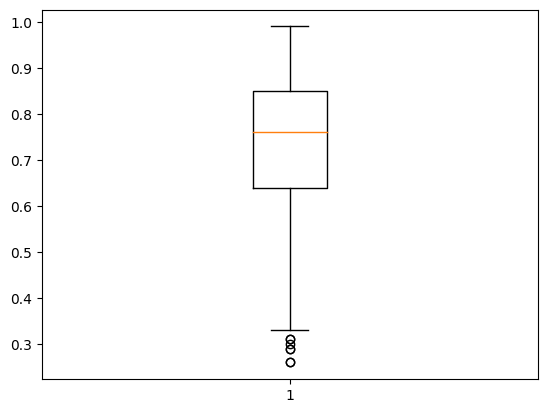

In [ ]:
#making the graph
import matplotlib.pyplot as plt

plt.boxplot(df3)
plt.show()

In [ ]:
#dealing with the outliars

#removing all the rows with the outliars
df4 = df2.drop(df2[upper_outliers.keys()])
df5 = df4.sort_values(ascending=True)
df5

1190    0.26
1668    0.26
1587    0.29
1278    0.29
1039    0.30
        ... 
53      0.97
13      0.97
205     0.97
181     0.98
178     0.99
Name: Customer satifaction, Length: 1711, dtype: float64